# 情報計算科学の基礎 レポート 5（差分解析）

<div style="text-align: right;">
    J4-210435 薬師神晴悟
</div>

2 次元の波動方程式

$$
    \frac{1}{c^2}\frac{\partial^2u}{\partial t^2} = \frac{\partial^2u}{\partial x^2}+\frac{\partial^2u}{\partial y^2}
$$

を求解することを考える。ここで、対象領域は$0 \leq x \leq 1,\, 0 \leq y \leq 1,\, 0 \leq t \leq 1.5$、
波速$c = 1$とする。境界条件として、領域外周 4 辺に中心周波数$\alpha = 1\,\mathrm{Hz}$のリッカー波

$$
    u(x, y, t) = \left(1 − 2\alpha^2\pi^2(t − t_0)^2\right)e^{−\alpha^2 \pi^2 (t−t_0)^2}
$$

を入力する。ここで$t_0=1$とする。初期条件として、$u(x, y, 0) = 0, \frac{\partial u}{\partial t} (x, y, 0) = 0$とする。離散化には二階中心差分を用い、簡単のため格子間隔は$x, y$方向に一定（$ds$）、時間方向にも一定とする（$dt$）。

1. $ds = 0.05,\, dt = 0.025$とした場合に得られる応答$u$の分布（時系列のコンター、及び、$(x, y) = (0.6, 0.6)$の時刻歴波形）を可視化せよ。
1. $ds,\, dt$を変化させた解析を実行し、この問題における数値解の収束性・安定性について論ぜよ。


## 解析コードの骨格

このコードを書き替えて差分法解析としてください


In [8]:
import numpy as np
import math

dx = 0.05  # ds
dy = dx
dt = 0.025
tmin = 0.0
tmax = 1.5  # simulate time

# rectangle domain
xmin = 0.0
xmax = 1.0
ymin = 0.0
ymax = 1.0

nx = int((xmax - xmin) / dx) + 1
ny = int((ymax - ymin) / dy) + 1
nt = int((tmax - tmin) / dt) + 2

# mesh
X = np.linspace(xmin, xmax, nx)  # 'np.linspace': 要素数を指定して等差数列を生成
Y = np.linspace(ymin, ymax, ny)
X, Y = np.meshgrid(Y, X)  # `np.meshgrid`: 格子点を生成

# solution
u = np.zeros((nt, nx, ny))

print("nx=", nx, "ny=", ny, "nt=", nt)

umax = 4
umin = -4

t0 = 1.0
alpha = 1.0
c = 1.0

ds = dx


def calc_u(x, y, t):
    if t == 0:
        return 0
    if x == 0 or x == nx - 1 or y == 0 or y == ny - 1:
        t *= dt
        return (1 - 2 * alpha**2 * math.pi**2 * (t - t0) ** 2) * math.e ** (
            -(alpha**2) * math.pi**2 * (t - t0) ** 2
        )
    return (
        (c**2 * dt**2 / ds**2)
        * (
            (u[t - 1][x + 1][y] - 2 * u[t - 1][x][y] + u[t - 1][x - 1][y])
            + (u[t - 1][x][y + 1] - 2 * u[t - 1][x][y] + u[t - 1][x][y - 1])
        )
        + 2 * u[t - 1][x][y]
        - u[t - 2][x][y]
    )


# simulation
for t in range(1, nt - 1):
    for x in range(0, nx):
        for y in range(0, ny):
            u[t][x][y] = calc_u(x, y, t)

print("simulation: Done")

nx= 21 ny= 21 nt= 62
simulation: Done


In [14]:
for l in range(40,60):
    print(calc_u(x=0, y=20, t=l))

1.0
0.9815893445223556
0.9274825968732854
0.8409595270411291
0.7271772599713069
0.592741768247464
0.4451736366058348
0.2923233639975972
0.1417942001082502
0.0004262704902750199
-0.1261145121115687
-0.2336137842336579
-0.3194399560777623
-0.38253335004647376
-0.4232714076912357
-0.44323848266852944
-0.4449345216001705
-0.4314580501071725
-0.40619587671834584
-0.37254581765296646


## 解析結果の可視化


以下のセルを実行すると各時刻での各点における$u$の値を$[\mathrm{umin}, \mathrm{umax}]$の範囲に制限し、三次元のアニメーションとして描写します。

※ セルの実行に 1 分ほどかかります。


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

%matplotlib notebook


fig = plt.figure()
fig.set_dpi(100)
ax = Axes3D(fig)
surf = ax.plot_surface(
    X, Y, u[0], rstride=1, cstride=1, cmap=plt.cm.coolwarm, vmax=umax, vmin=umin
)
fig.colorbar(surf, shrink=0.6, aspect=10, label="response u")


def animate(i):
    ax.clear()
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlim(umin, umax)
    ax.plot_surface(
        X, Y, u[i], rstride=1, cstride=1, cmap=plt.cm.coolwarm, vmax=umax, vmin=umin
    )


anim = animation.FuncAnimation(fig, animate, frames=nt - 1, interval=100, repeat=True)

rc("animation", html="jshtml")
anim

<IPython.core.display.Javascript object>

以下の関数群を解析結果の可視化に使用しても構いません


In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


def visualize_3d_graph(Z, umin, umax):
    fig = plt.figure()
    fig.set_dpi(100)

    ax = Axes3D(fig)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlim(umin, umax)
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                           cmap=plt.cm.coolwarm, vmax=umax, vmin=umin)
    fig.colorbar(surf, shrink=0.6, aspect=10, label='response u')

    fig.show()


def visualize_2d_graph(Y, dt):
    plt.grid()
    plt.xlabel('time t')
    plt.ylabel('response u')
    X = [dt*t for t in range(len(Y))]
    plt.plot(X, Y)

    plt.show()


関数 visualize_3d_graph は、時刻$　t　$での各点における$u$の値を$[\mathrm{umin}, \mathrm{umax}]$の範囲に制限して三次元グラフとして描写します。

グラフは右クリックで保存することができます。

![](https://drive.google.com/uc?export=view&id=1WLWQfUgtJdoJdvr_vckvmfT-eM8KnJW2)


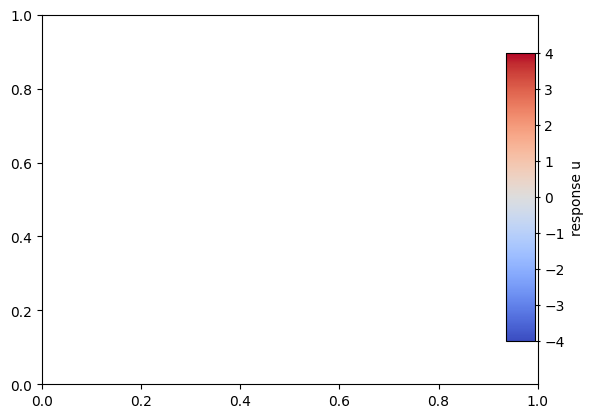

In [5]:
visualize_3d_graph(u[20], umin, umax)


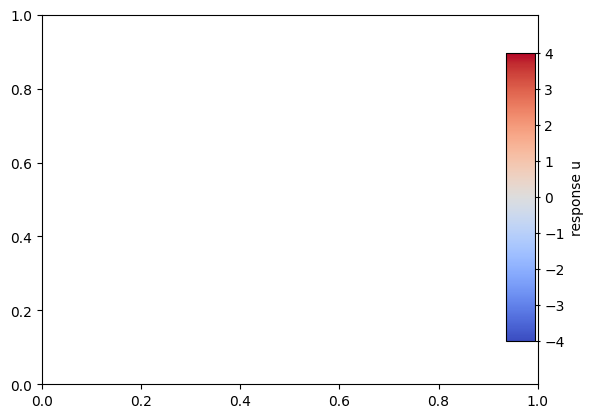

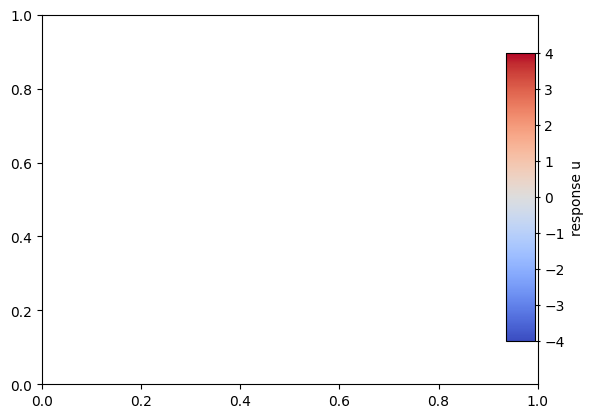

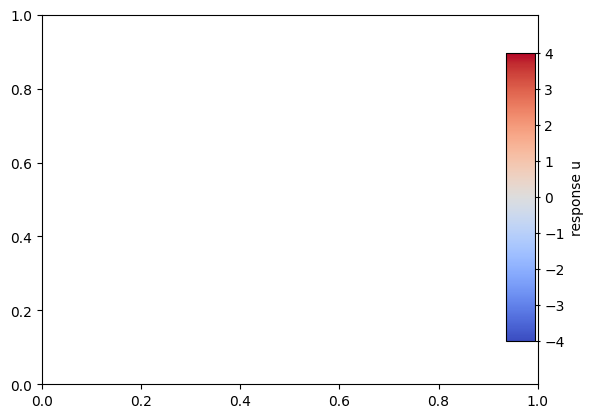

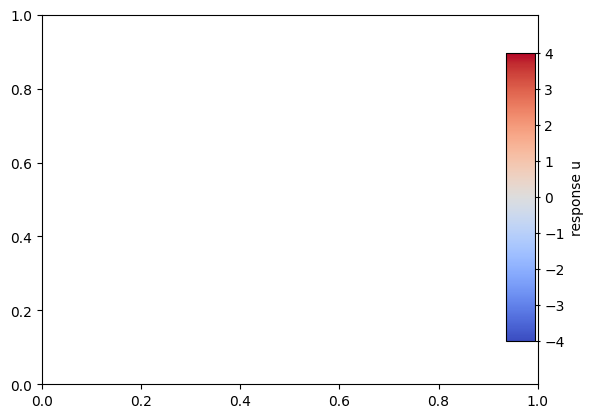

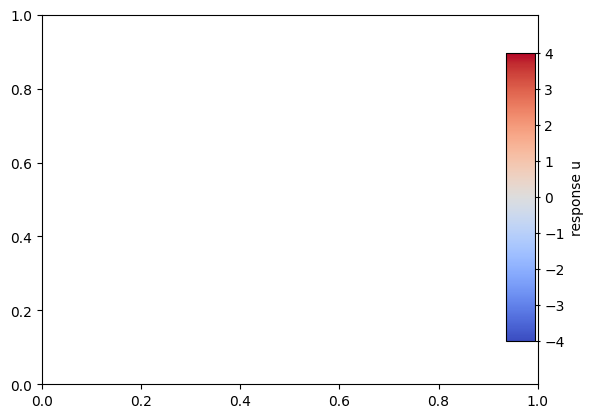

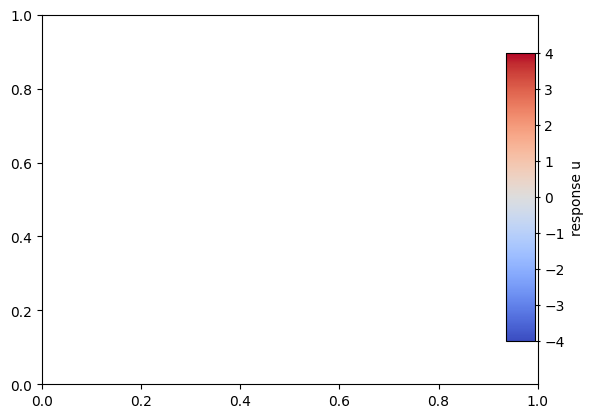

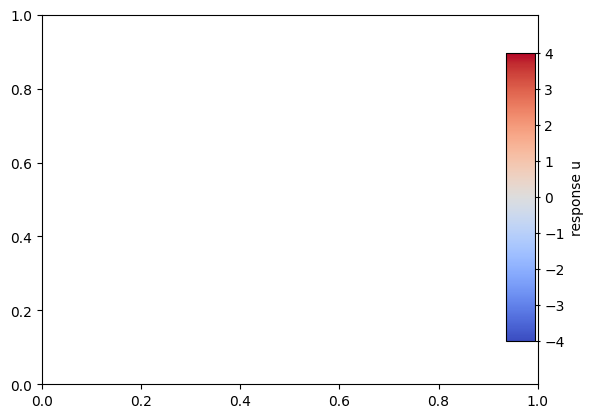

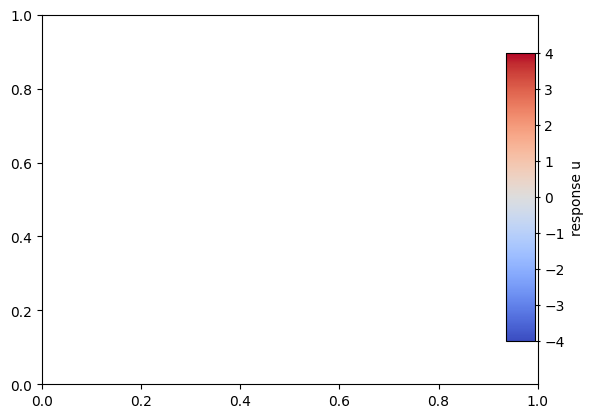

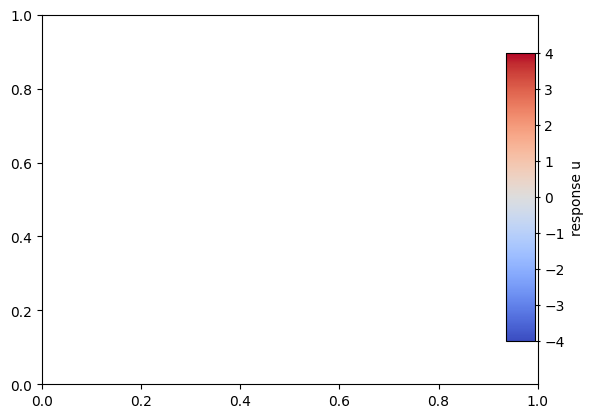

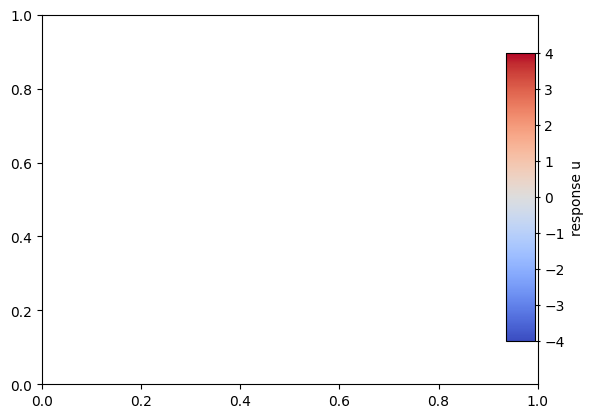

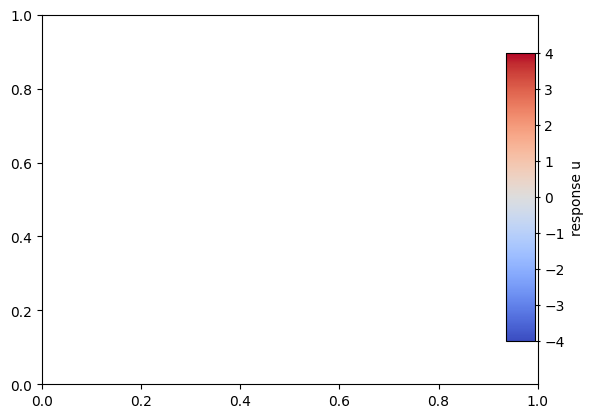

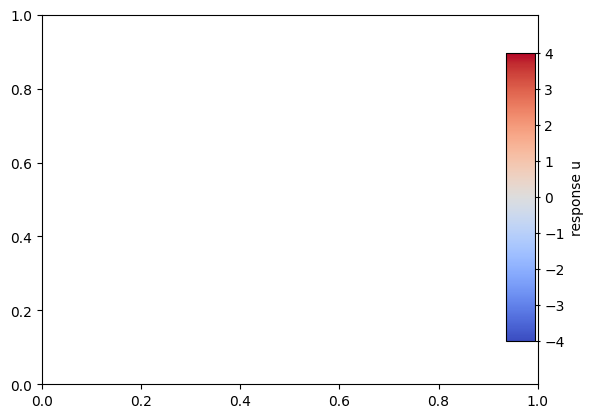

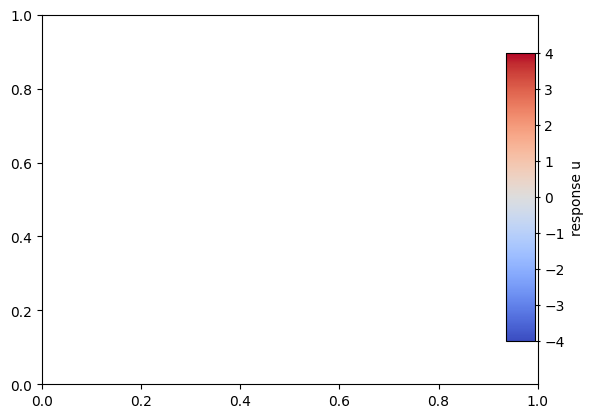

In [6]:
for t in range(0, nt-1, 5):
    visualize_3d_graph(u[t], umin, umax)

関数 visualize_2d_graph は、点$(x, y)$における$u$の$dt$刻みの時刻歴データを二次元グラフとして描写します。

こちらも右クリックでグラフを保存することができます。


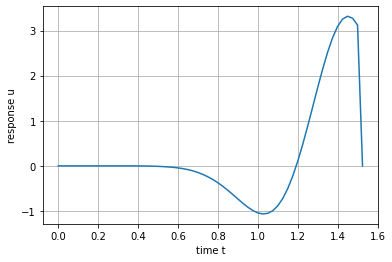

In [6]:
visualize_2d_graph(u[:, 12, 12], dt)
